![my picture](https://cdn.vectorstock.com/i/1000x1000/54/63/slice-of-watermelon-with-banana-and-apple-kawaii-vector-24605463.webp)

- apple width = 7cm
- apple length = 7cm
- banana width = 3cm
- banana length = 10cm
- watermelon width = 25cm
- watermelon length = 25cm

- apple : 0
- banana : 1
- watermelon : 2

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 

In [30]:
n = 3000
apple_width = np.random.normal(7, 2, n)
apple_length = np.random.normal(7, 2, n)
banana_width = np.random.normal(3, 1, n)
banana_length = np.random.normal(10, 3.5, n)
watermelon_width = np.random.normal(25, 5, n)
watermelon_length = np.random.normal(25, 5, n)

In [31]:
# Unknown Fruit
x_width = 5
x_length = 6

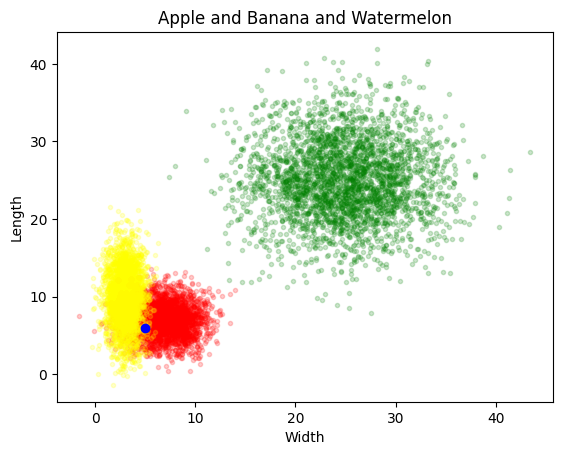

In [32]:
plt.scatter(apple_width, apple_length, c='red', marker='.', alpha=0.2)
plt.scatter(banana_width, banana_length, c='yellow', marker='.', alpha=0.2)
plt.scatter(watermelon_width, watermelon_length, c='green', marker='.', alpha=0.2)

plt.scatter(x_width, x_length, c='blue', marker='o')

plt.title('Apple and Banana and Watermelon')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

#### KNN - K Nearest Neighbors

In [33]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
length = np.concatenate((apple_length, banana_length, watermelon_length))

X_train = np.array([width, length]).T
X_train

array([[ 8.49071119,  4.37941571],
       [ 5.96133698,  8.20176764],
       [ 5.65104621,  8.62399235],
       ...,
       [26.59317416, 22.09527893],
       [27.08196076, 24.1681719 ],
       [25.85575026, 29.02482586]])

In [34]:
Y_apples = np.zeros(n, dtype='int')
Y_bananas = np.ones(n, dtype='int')
Y_watermelon = np.ones(n, dtype='int') * 2

Y_train = np.concatenate((Y_apples, Y_bananas, Y_watermelon))
Y_train

array([0, 0, 0, ..., 2, 2, 2])

In [35]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [36]:
new_fruit = np.array([5, 7])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)
    
distances

[4.3649200006399855,
 1.538965318840875,
 1.7496320568652672,
 1.0410914710295327,
 5.308253940467053,
 4.002296812826478,
 2.648120553872879,
 3.554345077887594,
 2.4660315404866413,
 2.8314905505604497,
 2.1936448214768665,
 2.7158116387335616,
 0.5897275724422801,
 2.2049487153647505,
 2.2450565784232355,
 2.5071184194758445,
 3.0980545295553457,
 0.8139153101914791,
 4.960226405974476,
 1.6292410692990218,
 1.0511751111220622,
 2.071418097433008,
 0.8658044205675419,
 2.780615621137916,
 2.8123783558766546,
 6.898935200654184,
 3.1668003947391963,
 0.2968937213354208,
 4.923696326017909,
 2.843257427206284,
 0.5768901211174835,
 4.789024121254233,
 2.452921610939203,
 2.8909913715360718,
 5.4508390693610655,
 3.3266250508717516,
 1.3141062035613786,
 5.171566723404655,
 1.2257348825686247,
 4.872118875381209,
 3.526943368918971,
 1.8611649610829362,
 3.562145780317845,
 6.05392953692805,
 5.628387517674201,
 2.5873700753469477,
 2.209803139202551,
 4.605319726806772,
 3.01129192900

In [37]:
k = 7

print(np.sort(distances)[:k])
print(np.argsort(distances)[:k])

nearest_neighbors = np.argsort(distances)[:k]

[0.02934612 0.03424543 0.15890113 0.15909442 0.16187894 0.19793882
 0.22375943]
[4945 2272  247 1617 1332  174 2526]


In [38]:
Y_train[nearest_neighbors]

array([1, 0, 0, 0, 0, 0, 0])

In [39]:
np.bincount(Y_train[nearest_neighbors])

array([6, 1])

In [40]:
result = np.argmax(np.bincount(Y_train[nearest_neighbors]))
result

0

In [41]:
if result == 0:
    print('🍎')
elif result == 1:
    print('🍌')
elif result == 2:
    print('🍉')

🍎
